# Assignment Kennis en Data

## Notebook made by


|Naam|Studentnummer|
|-|-|
|Jesse|secret |
|Wouter|secret |
|Rama|secret |
|Koen|secret |

## Peerreview

* Vul onderstaande dict/tabel in en run de cel. Klopt het? Zijn jullie het er allemaal mee eens?
    * Verander `1,2,3,4` door jullie studentnummers
    * `1: {1:.2,2:.3,3:.3,4:.2}` betekent dat student 1 zijn punt zo over de 4 studenten verdeelt
    * Let op, per student moeten de punten optellen tot 1!
    * De gegeven punten staan in de tabel op de rijen, de ontvangen punten in de kolommen.
    * met `cijfer_per_student` kan je bepalen welk cijfer ieder krijgt bij een gegeven groepscijfer.

## Toelichting

* De meeste opgaven worden automatisch nagekeken. Bij vrijwel alle opdrachten staan er een paar tests onder de opdracht, dit is voornamelijk om te zorgen dat je de juiste type output geeft. Dit zijn dus *NIET* alle tests, die komen er bij het graden nog bij.
* Elke vraag is 1 punt waard, tenzij anders aangegeven. Soms is die punt onderverdeeld in deelpunten, maar niet altijd. 

## Voor het inleveren!

* Pas niet de cellen aan, vooral niet die je niet kunt editen. Dit levert problemen op bij nakijken. Twijfel je of je per ongeluk iets hebt gewijzigd, kopieer dan bij inleveren je antwoorden naar een nieuw bestand, zodat het niet fout kan gaan.

* Zorg dat de code goed runt van boven naar beneden, verifieer dat door boven in Kernel -> Restart & Run All uit te voeren

## Na het inleveren!

* Het gebeurt erg vaak dat mensen een "leeg bestand" inleveren. Vaak een andere versie van de opgave die nog ergens op je computer rondslingerde. Zonde van al je werk toch!
* Dus, lever **minstens een half uur voor tijd in**. Download dan wat je hebt ingeleverd op Canvas. Geef het een andere naam om verwarring te voorkomen. En draai alle cellen, en bekijk het. Geen syntax fouten? Alle vragen gemaakt? Dan zit het vast wel goed, en hoef je niet in de zenuwen te zitten.

# Linked Data project

Maak een notebook met een end-to-end project gebaseerd op wikidata, en neem bijvoorbeeld deze als inspiratie:
* Mooie tutorial van begin tot eind met goede video: <https://media.ed.ac.uk/media/Wikidata+Sparql+Query+Tutorial/1_7v9v6s04> (Vrouwen educated in university of edinburg)
* Leuke tutorial met notebooks beschikbaar: <https://towardsdatascience.com/where-do-mayors-come-from-querying-wikidata-with-python-and-sparql-91f3c0af22e2>
* [Deze pagina](https://www.wikidata.org/wiki/Wikidata:WikiProject_every_politician/Netherlands/data/House/All_Members) over Nederlandse politici bevat een mooi begin, waar je nog heel wat moois van kan maken. 
* Of [deze](https://www.wikidata.org/wiki/Wikidata:WikiProject_Netherlands_Public_Libraries/Branches/By_Organisation) over bibliotheken. Ook hier kan je zowel het spreadsheet veel rijker maken, als natuurlijk op basis daarvan een geweldige interface maken.
    * Maar er is al een hoop mee gedaan hoor: zie bijvoorbeeld <https://www.wikidata.org/wiki/Wikidata:WikiProject_Netherlands_Public_Libraries/Maps#Country>
* <https://www.wikidata.org/wiki/Wikidata:WikiProject_COVID-19>


## Vereisten

1. Leuk probleem, goed uitgewerkt en gemotiveerd. Origineel, maar kan natuurlijk gebaseerd zijn op eerder werk.
    * Wees heel eerlijk met je inspiratiebronnen, en noem ze, en benoem exact waar jij verder bent gegaan (wat zijn jullie toevoegingen?)
2. Het moet gaan over **Nederlandse** data, of data over Nederland. 
    * Natuurlijk mag er ook een verband met het buitenland zijn.
2. Een dataset die je met SPARQL uit wikidata haalt, en die je netjes beschrijft, en aangeeft dat de data "klopt" met jouw probleem.
    * je dataset moet wel echt wat body hebben: dus flink wat rijen (items), en kolommen (eigenschappen)
    * je kan je data in spreadsheet formaat of SQL formaat of zelfs JSON formaat opslaan, en er dan later mee verder werken in Python-Pandas, SQL, of direct met python dicts.
3. Je laat nu op een aansprekende manier zien hoe jouw data jouw probleem oplost.
    * Dit kan prima in een jupyter notebook. Het is een **functioneel prototype** voor een mogelijke webapplicatie. 
    * Je kan [python widgets](https://ipywidgets.readthedocs.io/en/stable/examples/Widget%20Basics.html) gebruiken voor interactie met gebruiker
    * of plotly en dash voor gave interactieve plots en visuals (of seaborn als je het saai statisch wilt houden)
4. Schrijf een reflectie.
5. Jouw hele "blogpost/tutorial" is een Jupyter notebook die standalone perfect draait. (mits verbonden met het web).
6. Je plaatst je notebook op een publiek github adres, of ergens op Google colab. Met gedraaide output. Het is belangrijk dat anderen jouw notebook 
    * heel makkelijk kunen lezen
    * heel makkelijk kunnen downloaden, en runnen.
        * dus als je niet standaard modules gebruikt zet je in een aparte uitgecommentarieerde cel de `pip install commands`
7. En levert hem natuurlijk ook weer in via Canvas.

### Grading

* Ook hier weer via peer review binnen je groep.
* Plus een expert review van je tutor.
* Maak er wat moois, leerzaams, gaafs, en verrassends van! 

In [1]:
from plotly.subplots import make_subplots
import plotly.express as px
import pandas as pd 
import seaborn as sn
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.figure_factory as ff
import numpy as np
from SPARQLWrapper import SPARQLWrapper, JSON
from pandas.io.json import json_normalize
import pandas as pd
import requests
import networkx as nx
import warnings
warnings.filterwarnings('ignore')

Error importing optional module geopandas
Traceback (most recent call last):
  File "/Users/admin/anaconda/envs/python3.6/lib/python3.6/site-packages/_plotly_utils/optional_imports.py", line 28, in get_module
    return import_module(name)
  File "/Users/admin/anaconda/envs/python3.6/lib/python3.6/importlib/__init__.py", line 126, in import_module
    return _bootstrap._gcd_import(name[level:], package, level)
  File "<frozen importlib._bootstrap>", line 994, in _gcd_import
  File "<frozen importlib._bootstrap>", line 971, in _find_and_load
  File "<frozen importlib._bootstrap>", line 955, in _find_and_load_unlocked
  File "<frozen importlib._bootstrap>", line 665, in _load_unlocked
  File "<frozen importlib._bootstrap_external>", line 678, in exec_module
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
  File "/Users/admin/anaconda/envs/python3.6/lib/python3.6/site-packages/geopandas/__init__.py", line 1, in <module>
    from geopandas.geoseries import Ge

# Een objectief beeld van het politieke klimaat 🗞️
#### een linked data project door Jesse Kommandeur Wouter Knibbe, Rama Pamudji en Koen Berenschot 

## Probleemstelling
Er is weinig kennis over de relatie tussen persoonlijke informatie van politici (zoals demografische gegevens) en de doelen die hun politieke partijen nastreven. De hypothese van dit Linked data project is dat een groot verband zou kunnen zijn tussen de persoonlijke kenmerken van politici en de kenmerken van hun partijen. Deze hypothese is gebaseerd op wetenschappelijk onderzoek, waaruit blijkt dat de context waarin het individu leeft invloed heeft op de ontwikkeling van gedrag en wereldbeeld. *“Confirmation bias is the tendency to search for, interpret, favor, and recall information in a way that confirms or supports one's prior beliefs or values”*. 

#### Geloven 💭, principes 🙌 en perceptie 👁️ 
De geloven, principes en perceptie die politici hebben vormen de basis voor hun beslissingen. Deze beslissingen leiden tot bepaalde uitkomsten en keuzes in hun leven. Een deel van deze uitkomsten en keuzes is publieke informatie opgeslagen in wikidata. Uitkomsten zoals de hoeveelheid kinderen die je heb en bij wat voor organisaties je hebt gewerkt. Maar ook keuzes over hoe je hebt gestemt over politieke onderwerpen. Dus we kunnen vanaf de uitkomsten en keuzes terugredeneren (tot op bepaald niveau!) naar wat ongeveer hun geloven, principes en perceptie zijn zijn.

#### Maar wat onderzoek je dan? 🔍
Het is dus interessant om te onderzoeken of dit ook geldt voor politici: Hebben politici van D66 gemiddeld gezien bijvoorbeeld meer kinderen dan politieke leiders van andere partijen? En zou je daaruit kunnen afleiden dat Sigrid Kaag (lijsttrekker D66) zich daarom meer inzet voor onderwijs? En heeft dit bijvoorbeeld te maken met het feit dat zij twee kinderen heeft die naar school gaan, en daardoor zelf meer in aanraking komt met onderwijs (en het belang ervan) dan Geert Wilder (lijsttrekker PVV) die geen kinderen heeft en wiens partij onderwijs een lager op het partijprogramma heeft staan? 

Dus, verwacht je dat een politici keuze A zou doen, maar in hun verkiezingsprogramma pleiten zij voor keuze B, hoe is dat dan te verklaren? Verwacht je van een politici keuze A en zei pleiten ook voor A, wat zegt dat dan over hen? Neemt de hoeveelheid vertrouwen in een politici toe wanneer deze te voorspellen is of juist af? Wat voor informatie heb je nog meer nodig om dat te zeggen? Dat laten we over aan het Nederlandse volk. Het in ieder geval interessante informatie die de beslissing om op iemand te stemmen flink kan beïnvloeden. **Ons doel is om deze data helder en inzichtelijk te maken, om zo objectieve informatie over het politieke klimaat te geven.** Zo herinneren wij Nederlanders er weer aan dat ook politici, net als zijzelf, voorspelbare mensen zijn.

## Aard van de data 📊

### SPARQL - Wikidata 🌐
Voordat politieke data-analyses uitgevoerd kunnen worden, zal er eerst data verzameld moeten worden. Als startpunt is er gekozen voor de bestaande dataset van wikidata: https://www.wikidata.org/wiki/Wikidata:WikiProject_every_politician/Netherlands/data/House/All_Members. Deze pagina met wikidata over alle politici inclusief hun start- en einddatum in de politiek is erg *sparse*. De pagina’s van de politici waarnaar gerefereerd wordt in deze lijst bevat echter veel interessante informatie. Van deze volksvertegenwoordigers is de onderstaande data verzameld. Op basis van deze deze data kan de ‘context’ van een politicus geschetst worden.

- Geslacht
- Land van burgerschap
- Geboortedatum
- Geboorteplek (stad)
- Moedertaal
- Gesproken/geschreven talen
- Beroep (incl. verleden beroepen)
- Werkgever (incl. verleden werkgevers)
- Positie in de politiek (incl. verleden posities)
- Opleiding (specifiek welke school)
- Woonplek
- Lid politieke partij (incl. verleden partijen)
- Religie
- Social media aanhang
- Instrument (muziek)
- Aantal kinderen
- Begin periode tweede kamer
- Eind periode tweede kamer


### Politici 👩‍💼👨‍💼
Omdat politici als [Abraham Boxman (1796-1856)](https://nl.wikipedia.org/wiki/Abraham_Boxman) voor het toekomstige politieke klimaat een  stuk minder relevant zijn dan volksvertegenwoordigers als [Sigrid Kaag](https://nl.wikipedia.org/wiki/Sigrid_Kaag), wordt er alleen data te verzameld van politici die mee doen aan de **Tweede Kamer verkiezingen van 2021**. Na het uitvoeren van een  SPARQL query blijkt dat 508 mensen zich verkiesbaar hebben gesteld voor de verkiezingen op 17 maart 2021. 

In [2]:
## sparql query for al politicians
sparql = SPARQLWrapper('https://query.wikidata.org/sparql')

sparql.setQuery('''
SELECT DISTINCT ?personLabel ?genderLabel ?partyLabel
WHERE {
    ?person wdt:P3602 wd:Q42733725.
    SERVICE wikibase:label { bd:serviceParam wikibase:language "en" }
}
''')

sparql.setReturnFormat(JSON)
results = sparql.query().convert()
results_df = json_normalize(results['results']['bindings'])

verkiesbaar = list()

for x in range(len(results_df['personLabel.value'])):
    verkiesbaar.append(results_df['personLabel.value'][x])

print("Er doen", len(verkiesbaar), "volksvertegenwoordigers mee met de Tweede Kamerverkiezingen")
print("Hier een aantal voorbeelden", verkiesbaar[0:5])

Er doen 639 volksvertegenwoordigers mee met de Tweede Kamerverkiezingen
Hier een aantal voorbeelden ['Norbert Klein', 'Pieter Heerma', 'Geert Wilders', 'Roelof Bisschop', 'Ank Bijleveld']


### Partijen 🗣️
Naast historische politici zijn historische partijen ook minder interessant. Na het uitvoeren van weer een SPARQL query blijkt dat er  in totaal 43 partijen meedoen aan de Tweede Kamerverkiezingen van 2021. In de realiteit is dit anders, en zijn de namen van politieke partijen natuurlijk ook niet in het Engels. Daarom 'hardcoden' we politieke partijen in dit geval. In de reflectie komen we hier op terug.

In [3]:
## sparql query for al political parties
sparql = SPARQLWrapper('https://query.wikidata.org/sparql')

sparql.setQuery('''
SELECT DISTINCT ?personLabel ?genderLabel ?partyLabel
WHERE {
    ?person wdt:P3602 wd:Q42733725.
    ?person wdt:P21 ?gender.
    ?person wdt:P102 ?party. 
    SERVICE wikibase:label { bd:serviceParam wikibase:language "en" }
}
''')

sparql.setReturnFormat(JSON)
results = sparql.query().convert()
results_df = json_normalize(results['results']['bindings'])

partijen = list()

for x in range(len(results_df['personLabel.value'])):
    partijen.append(results_df['partyLabel.value'][x])

results_df[['personLabel.value', 'genderLabel.value', 'partyLabel.value']]

partijen = set(partijen)

print("Er doen", len(set(partijen)), "partijen mee met de Tweede Kamerverkiezingen")
print("Hier een aantal voorbeelden", list(partijen)[:2])

Er doen 45 partijen mee met de Tweede Kamerverkiezingen
Hier een aantal voorbeelden ["Catholic People's Party", 'Lokaal in de Kamer']


### Kandidaten en partijen 👩‍💼👨‍💼 ∩ 🗣️

Nu we weten welke partijen en kandidaten er mee doen aan de tweede kamer verkiezingen van 2021, is het voor een analyse interessant deze data te combineren. Welke politicus vertegenwoordigd welke partij? Ook hier wordt een dictionary teruggeven. Deze keer met als key de naam van de politicus en als value een string met de naam van de partij.

In [4]:
sparql = SPARQLWrapper('https://query.wikidata.org/sparql')

sparql.setQuery('''
SELECT DISTINCT ?personLabel ?partyLabel
WHERE {
    ?person wdt:P3602 wd:Q42733725.
    ?person wdt:P102 ?party.
    SERVICE wikibase:label { bd:serviceParam wikibase:language "en" }
}
''')

sparql.setReturnFormat(JSON)
results = sparql.query().convert()
results_df = json_normalize(results['results']['bindings'])

party= {}

for x in range(len(results_df['personLabel.value'])):
    party[results_df['personLabel.value'][x]] = results_df['partyLabel.value'][x]
    
print('Een paar politici en tot welke partij zij behoren: ')
list(party.items())[:5]

Een paar politici en tot welke partij zij behoren: 


[('Caroline van der Plas', 'Farmer-Citizen Movement'),
 ('Anna Zeven', 'Lijst30'),
 ('Christian Kromme', 'Lijst30'),
 ('Koen Verhagen', 'Lijst30'),
 ('Mordechai Krispijn', 'Lijst30')]

### Gemiddelde leeftijd per partij 👴🏻

Nu duidelijk is welke partijen mee doen aan de kamerverkiezingen van 2021, is het interessant om naar bepaalde eigenschappen van deze partijen te kijken. Eerst nemen we een kijkje in de gemiddelde leeftijd per partij. Deze zijn weergegeven in een dictionary, waarbij de key de partijen zijn en de value de gemiddelde leeftijd.

In [5]:
sparql = SPARQLWrapper('https://query.wikidata.org/sparql')

sparql.setQuery('''
SELECT DISTINCT ?personLabel ?age ?partyLabel
WHERE {
    ?person wdt:P3602 wd:Q42733725.
    ?person wdt:P569 ?born.
    ?person wdt:P102 ?party.
    BIND(now()- ?born AS ?ageInDays).
    BIND(?ageInDays/365.2425 AS ?ageInYears).
    BIND(FLOOR(?ageInYears) AS ?age).
    SERVICE wikibase:label { bd:serviceParam wikibase:language "en" }
}
''')

sparql.setReturnFormat(JSON)
results = sparql.query().convert()

results_df = json_normalize(results['results']['bindings'])

kandidaat= {}
partij= {}

for x in range(len(results_df['personLabel.value'])):
    partij[results_df['personLabel.value'][x]] = results_df['partyLabel.value'][x]

for x in range(len(results_df['personLabel.value'])):
    kandidaat[results_df['personLabel.value'][x]] = results_df['age.value'][x]

partijenLeeftijd = {}    
    
for x in set(results_df['partyLabel.value']):
    count=0
    leeftijd=0
    
    for y in kandidaat:
        if partij[y] == x:
            count+=1
            leeftijd+=int(float(kandidaat[y]))
    
    if count != 0:
        partijenLeeftijd[x] = round(leeftijd/count)
  
print('de gemiddelde leeftijd van de partijen: ')
list(partijenLeeftijd.items())[:5]

de gemiddelde leeftijd van de partijen: 


[("Catholic People's Party", 93),
 ('United Democrats', 56),
 ('BIJ1', 57),
 ('Labour Party', 44),
 ('Partij van de Eenheid', 50)]

### Partijen en hun kinderen 👨‍👩‍👦

Queries kunnen verder ook gebruikt worden om erachter te komen hoeveel kinderen de kandidaten van een bepaalde partij in totaal hebben. De verkregen informatie kan gebruikt worden om correlaties te vinden tussen de partijen en de moties waar zij mee ingestemd hebben. 

Een voorbeeld hiervan is de motie van D66 van 18 april 2020 met als titel `Kinderopvang als basisvoorziening`, dit werd verder gesteund door de SP en afgekeurd door de VVD. In de onderstaande dict is te zien dat D66 11 totaal aantal kinderen heeft en de SP 15 kinderen en wellicht daarom allebei de motie steunden. In tegenstelling tot de D66 en de SP was VVD (People's Party for Freedom and Democracy) er niet mee eens en is er te zien dat de VVD maar 4 kinderen in totaal heeft. Hieruit zou uit geconcludeerd kunnen worden dat politici die zelf ouders zijn ook meer medeleven hebben voor de ouders van Nederland.

In [6]:
sparql = SPARQLWrapper('https://query.wikidata.org/sparql')

sparql.setQuery('''
SELECT DISTINCT ?personLabel ?nocLabel ?partyLabel
WHERE {
    ?person wdt:P3602 wd:Q42733725.
    ?person wdt:P1971 ?noc. # Number of Children
    ?person wdt:P102 ?party.
    SERVICE wikibase:label { bd:serviceParam wikibase:language "en" }
}
''')

sparql.setReturnFormat(JSON)
results = sparql.query().convert()
results_df = json_normalize(results['results']['bindings'])

kinderen= {}
partij= {}
partij_kind={}

for x in range(len(results_df['personLabel.value'])):
    partij[results_df['personLabel.value'][x]] = results_df['partyLabel.value'][x]
    
for x in range(len(results_df['personLabel.value'])):
    kinderen[results_df['personLabel.value'][x]] = results_df['nocLabel.value'][x]    
    
for x in set(results_df['partyLabel.value']):
    count = 0
    for y in partij:
        if partij[y] == x:
            count+=int(kinderen[y])
    partij_kind[x] = count

print('Hoeveel kinderen de politici van iedere partij bij elkaar hebben:')
list(partij_kind.items())[:5]

Hoeveel kinderen de politici van iedere partij bij elkaar hebben:


[('Reformed Political Party', 2),
 ('Forum for Democracy', 4),
 ('Democrats 66', 11),
 ('Christian Union', 4),
 ('GroenLinks', 3)]

### Religie in de verkiezingen 🙏

Met behulp van queries kan ook achterhaald worden waar politici bijvoorbeeld in geloven. Er komt hier echter een probleem bij omdat pagina's op Wikidata soms niet compleet ingevuld zijn waardoor te weinig data beschikbaar is over  de religie kandidaten. Zo hangen volgens Wikidata maar `29 van de 503` kandidaten een religie aan. 

<AxesSubplot:ylabel='religionLabel.value'>

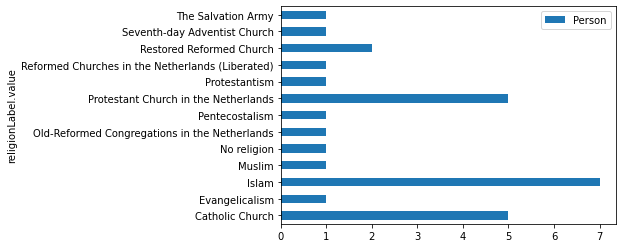

In [7]:
sparql = SPARQLWrapper('https://query.wikidata.org/sparql')

sparql.setQuery('''
SELECT DISTINCT ?personLabel ?religionLabel
WHERE {
    ?person wdt:P3602 wd:Q42733725.
    ?person wdt:P140 ?religion
    SERVICE wikibase:label { bd:serviceParam wikibase:language "en" }
}
''')

sparql.setReturnFormat(JSON)
results = sparql.query().convert()
results_df = json_normalize(results['results']['bindings'])

religie= list()

for x in range(len(results_df['personLabel.value'])):
    religie.append(results_df['religionLabel.value'][x])

results_df[['personLabel.value', 'religionLabel.value']].rename(columns={'personLabel.value':'Person'
                                                                        }).groupby(['religionLabel.value']).count().plot.barh()

### PANDAS - Moties Rutte II 🐼
Naast de verzamelende SPARQL data is er ook een andere dataset gedownload waarin [alle moties van kabinet Rutte II](https://watstemthetparlement.nl) zijn opgeslagen. Deze dataset hebben we online beschikbaar gemaakt via github, zodat de data van een online source geraadpleegd kan worden. Voordeel: geen dowloadtijd, geen extra schrijfruimte op je computer en geen ingewikkelde mapjes. Voor de analyse gebruiken we panda's.

In [8]:
pd.set_option('display.max_columns', None)
df = pd.read_csv("https://raw.githubusercontent.com/dieanderegast/datasets/main/StemmingenRutte2.csv",
                  sep=";", encoding='latin1')
df.head(2)

,id,file,document,title,date,proposaltype,votetype,result,voteURL,proposalURL,source,50PLUS,AOV,Bontes,Bontes/Van Klaveren,Brinkman,CD,CDA,ChristenUnie,D66,De Jong,Eerdmans/Van Schijndel,GPV,GroenLinks,Hendriks,Houwers,Klein,Kortenoeven/Hernandez,Kuzu/ ztrk,Lazrak,LN,LPF,Nawijn,Nijpels,PvdA,PvdD,PVV,RPF,SGP,SP,Unie 55+,Van Klaveren,Van Oudenallen,Van Vliet,Verdonk,Verkerk,VVD,Wijnschenk,Wilders,reign,author,authorparty,supporter,supporterparties,category,subcategory,categories,pro,contra
0,20121114-h-tk-20122013-22-10-100267125,33410,47,Kabinetsformatie 2012 ; Motie; Motie van het l...,14/11/2012,Motion,Normal,adopted,https://zoek.officielebekendmakingen.nl/h-tk-2...,https://zoek.officielebekendmakingen.nl/kst-33...,OB,1.0,NaN,NaN,NaN,NaN,NaN,1,1,1,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1.0,1.0,NaN,1.0,1,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,Kabinet-Rutte II,[Arie Slob],[ChristenUnie],"[Sybrand van Haersma Buma, Alexander Pechtold,...","[CDA, D66, SGP]",[Bestuur],[Organisatie en beleid],"Bestuur, Organisatie en beleid","[50PLUS, CDA, ChristenUnie, D66, GroenLinks, P...",[]
1,20121114-h-tk-20122013-22-10-117924796,33410,49,Kabinetsformatie 2012 ; Motie; Motie van het l...,14/11/2012,Motion,Normal,rejected,https://zoek.officielebekendmakingen.nl/h-tk-2...,https://zoek.officielebekendmakingen.nl/kst-33...,OB,1.0,NaN,NaN,NaN,NaN,NaN,1,1,1,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1.0,1.0,NaN,1.0,1,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,Kabinet-Rutte II,[Arie Slob],[ChristenUnie],"[Sybrand van Haersma Buma, Alexander Pechtold,...","[CDA, D66, GroenLinks, 50PLUS, SGP, PVV, PvdD,...",[Bestuur],[Organisatie en beleid],"Bestuur, Organisatie en beleid","[50PLUS, CDA, ChristenUnie, D66, GroenLinks, P...","[PvdA, VVD]"


### Filteren 📌
Vervolgens is deze dataset is gefilterd op partijen en volksvertegenwoordigers die zich verkiesbaar hebben gesteld tijdens de Tweede Kamerverkieaingen van 2021, dus op de variabele `verkiesbaar` die voort komt uit de SPARQL query hiervoen. Daarnaast is ook andere, voor dit onderzoek minder relevante data, uit het dataframe verwijderd. Zo zijn we bijvoorbeeld niet geïntresseerd in de `voteURL` of `proposalURL`. Na het filteren ziet het dataframe er als volgt uit.

In [9]:
df1 = df[['title','date','proposaltype', 'result','author', 'authorparty', 'supporter', 'supporterparties', 'category', 'subcategory', 
           'categories', 'pro', 'contra']]
strip = ['author', 'authorparty', 'supporter', 'supporterparties', 'category', 'subcategory', 'categories', 'pro', 'contra']
split = ['supporter', 'supporterparties', 'category', 'subcategory', 'categories']
nospace = ['pro', 'contra']
for i in strip:
    if i in split:
        df1[i] = df1[i].str.strip('[]').str.split(",")
    elif i in nospace:
        df1[i] = df1[i].str.strip('[]').str.strip().str.split(",")
    else:
        df1[i] = df1[i].str.strip('[]')


for i, lijst in enumerate(df1['supporter']):
    l = []
    for j, persoon in enumerate(lijst):
        if persoon:
            if persoon[0] == ' ':
                df1['supporter'][i][j] = persoon[1:]
            if persoon in verkiesbaar:
                l.append(persoon)
    df1['supporter'][i] = l
    if df1['author'][i] not in verkiesbaar:
        df1['author'][i] = []

for index, row in df1.iterrows():
    if row['author'] == []:
        if row['supporter'] == []:
            df1.drop(index, inplace=True)

In [10]:
df1.head(2)

,title,date,proposaltype,result,author,authorparty,supporter,supporterparties,category,subcategory,categories,pro,contra
2,Kabinetsformatie 2012 ; Motie; Motie van de le...,14/11/2012,Motion,rejected,Bram van Ojik,GroenLinks,[Emile Roemer],[SP],[Bestuur],[Organisatie en beleid],"[Bestuur, Organisatie en beleid]","[50PLUS, GroenLinks, PvdD, SP]","[CDA, ChristenUnie, D66, PvdA, PVV, SGP, ..."
4,Kabinetsformatie 2012 ; Motie; Motie van de le...,14/11/2012,Motion,rejected,Emile Roemer,SP,[Marianne Thieme],[PvdD],[Bestuur],[Organisatie en beleid],"[Bestuur, Organisatie en beleid]","[ChristenUnie, GroenLinks, PvdD, SP]","[50PLUS, CDA, D66, PvdA, PVV, SGP, VVD]"


### Dataframe analyse 🎛️
Na het filteren van de moties is de dataset erg rijk. Zo bestaat het dataframe uit `5943` rijen en `24` kolommen. Dit komt neer op een totaal aantal datapunten van `77.233`. Genoeg materiaal op een aantal analyses op uit te voeren dus!
Eerst een paar analyses om achter de aard van de data te komen. Zo blijkt uit onderstaande code dat van alle moties meer dan `65%` wordt afgewezen.

In [11]:
print('Het dataframe telt',len(df1),'rijen,',len(df1.columns),'kolommen en dus', len(df1)*len(df1.columns),'datapunten')

## rejection rate
adopted = len(df1.loc[df1['result'] == 'adopted'] )
rejected = len(df1.loc[df1['result'] == 'rejected'])
average_rejection = rejected / len(df1['result'])

print(average_rejection,'% van de moties werd afgewezen')

Het dataframe telt 5941 rijen, 13 kolommen en dus 77233 datapunten
0.6586433260393874 % van de moties werd afgewezen


### Het afwijzen van moties ❌
Leuk en aardig dat er zoveel moties werden afgewezen. Maar wie wees al die moties eigenlijk af? Uit de code hieronder blijkt dat de `VVD` het vaakst tegen een motie stemt, gevolgd door de `PvdA` en `SGP`. Ook blijkt uit de data-analyse dat deze partijen het met meer dan  `50%` van de moties oneens is. De VVD stemt zelfs maar bij 1 op de 4 moties voor. Kun je hieruit afleiden dat partijen als de VVD conservatief zijn? Aangezien ze zoveel moties willen afwijzen? Nee, die uitspraak is te voorbarig. Dat heeft immers met de **context** van de motie te maken.

Wezen het vaakst een motie af 

  VVD          4504
 PvdA         3790
 SGP          2993
 Van Vliet    2767
 D66          2586
Name: contra, dtype: int64 

Wezen het vaakst een motie af(%) 

   VVD          75.812153
 PvdA         63.793974
 SGP          50.378724
 Van Vliet    46.574651
 D66          43.528026
Name: contra, dtype: float64 



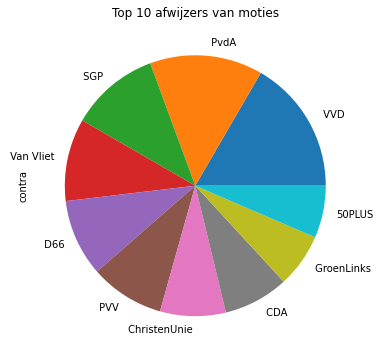

In [12]:
dfContra = df1[['contra']].explode('contra')
contra = dfContra['contra'].value_counts().head(5)
contra2 = dfContra['contra'].value_counts().head(10)

dfPie = contra2.plot.pie(figsize=(6, 6), title='Top 10 afwijzers van moties')

print('Wezen het vaakst een motie af \n\n', contra, '\n')
print('Wezen het vaakst een motie af(%) \n\n ', contra/len(df1) * 100, '\n')

### Het aannemen van moties ✅
Nu we weten wie het het vaakst moties afwezen, is het ook interessant om te weten welke partijen er het vaakst voor een bepaalde motie stemden. uit de data-analyse blijkt dat de `SP` het vaakst een motie aanneemt, gevolgd door de `PvdD` en `50PLUS`. Ook stemmen deze partijen (afgerond) in met `70%` van de moties of meer. Kun je hieruit afleiden dat partijen als de SP progressief zijn? Aangezien ze zoveel moties willen aannemen? Ook hier is die conclusie te kort door de bocht. De **context** van de motie is hier ook weer het belangrijkst.

Keurden het vaakst een motie goed 

  SP              4346
 PvdD            4288
50PLUS           4144
 GroenLinks      3764
 ChristenUnie    3214
Name: pro, dtype: int64 

Keurden het vaakst een motie goed(%) 

   SP              73.152668
 PvdD            72.176401
50PLUS           69.752567
 GroenLinks      63.356337
 ChristenUnie    54.098637
Name: pro, dtype: float64 



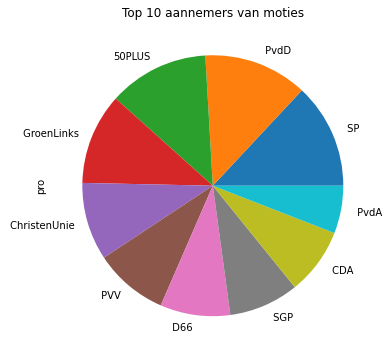

In [13]:
dfPro = df1[['pro']].explode('pro')
pro = dfPro['pro'].value_counts().head(5)
pro2 = dfPro['pro'].value_counts().head(10)

dfPie2 = pro2.plot.pie(figsize=(6, 6), title='Top 10 aannemers van moties')

print('Keurden het vaakst een motie goed \n\n', pro, '\n')
print('Keurden het vaakst een motie goed(%) \n\n ', pro/len(df1) * 100, '\n')

### Indienen van moties 📩
Nu we weten welke politieke partijen het vaakst moties afwijzen of aannemen, is hieronder aangegeven welke partijen het vaakst een motie hebben ingediend. Hieruit blijkt dat de `SP` en de `PVV` het vaakst een motie indienen.

Dienden het vaakst een motie in 

 SP      1041
PVV      986
CDA      982
D66      599
PvdD     495
Name: authorparty, dtype: int64 

Dienden het vaakst een motie in (%) 

 SP      17.522303
PVV     16.596533
CDA     16.529204
D66     10.082478
PvdD     8.331931
Name: authorparty, dtype: float64 



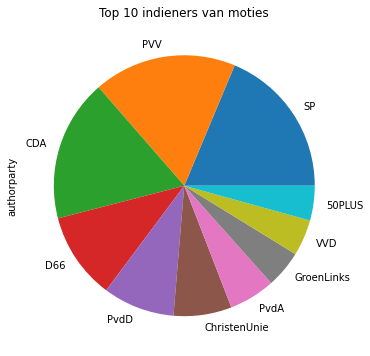

In [14]:
dfDien = df1[['authorparty']]
indieners = dfDien['authorparty'].value_counts().head(5)
indieners2 = dfDien['authorparty'].value_counts().head(10)

dfPie3 = indieners2.plot.pie(figsize=(6, 6), title='Top 10 indieners van moties')

print('Dienden het vaakst een motie in \n\n', indieners, '\n')
print('Dienden het vaakst een motie in (%) \n\n', indieners/len(df1) * 100, '\n')

### Het netwerk 🕸️
Dit is het netwerk van partijen die motie indienen en partijen die hen steunen in die moties. Iedere pijl gaat van een ondersteuner naar de indiener. Onder het netwerk is gevisualiseerd hoeveel moties iedere partij heeft ingediend die aanvaard of geweigerd zijn.

In [15]:
dfTeam = df1[['authorparty', 'supporterparties']].explode('supporterparties')
dfTeam['supporterparties'] = dfTeam['supporterparties'].str.strip()
dfTeam.head(10)
G = nx.from_pandas_edgelist(dfTeam, source='supporterparties', target='authorparty', edge_attr=True, create_using=nx.DiGraph())
G.remove_node('')
pos=nx.circular_layout(G)
nx.draw(G, pos, with_labels=True)
plt.show()

dfResult = df1[['result', 'authorparty', 'supporterparties', 'categories']]
dfResult[['authorparty', 'result', 'categories']].groupby(['authorparty', 'result']).count().head(10).plot.barh()

NetworkXError: Invalid edge_attr argument: No columns found with name: []

### Motie categorie 📥
Dan hebben we hier de hoeveelheid moties die iedere partij heeft ingediend per categorie en dan per subcategorie. Het zou interessant zijn om in vervolg onderzoek te kijken naar hoe dit correleert met bijvoorbeeld leeftijd of hoeveelheid kinderen. Dienen partijen met meer kinderen meer moties in ten behoeve van het onderwijs? 

Natuurlijk moeten we dan wel een dataset gebruiken waarbij de intentie van de motie duidelijk is. De PVV dient bijvoorbeeld veel moties in over de begroting, maar wordt de begroting daar dikker of dunner van?

<AxesSubplot:ylabel='authorparty,subcategory'>

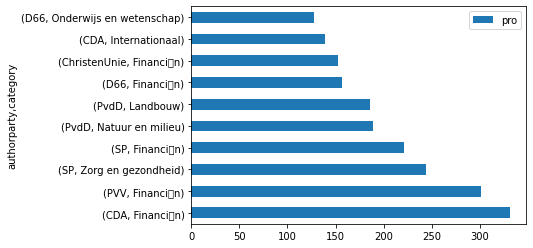

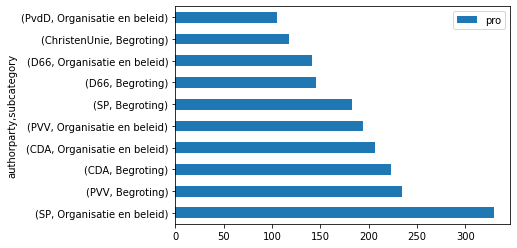

In [16]:
dfCata = df1[['authorparty', 'category', 'pro']].explode('category')
dfCata['category'] = dfCata['category'].str.strip()
dfCata = dfCata[['authorparty', 'category', 'pro']].groupby(['authorparty', 'category']).count().sort_values(['pro'], ascending=False).head(10)
dfCata.plot.barh()

dfCata2 = df1[['authorparty', 'subcategory', 'pro']].explode('subcategory')
dfCata2['subcategory'] = dfCata2['subcategory'].str.strip()
dfCata2 = dfCata2[['authorparty', 'subcategory', 'pro']].groupby(['authorparty', 'subcategory']).count().sort_values(['pro'], ascending=False).head(10)
dfCata2.plot.barh()

## Conclusie 🤔
Voorafgaand aan het end-to-end linked data project 'een objectief beeld van het politieke klimaat🗞️' was de doelstelling om de data helder en inzichtelijk te maken, om zo objectieve informatie over het politieke klimaat te geven. Deze doelstelling is in zekere zin gehaald. Er is een objectieve weergave gegeven van bepaalde onderdelen binnen de politiek. Zo is weergegeven hoeveel volksvertegenwoordigers en partijen er met de verkiezingen meedoen, hoe de context van deze groep mensen eruit ziet (zoals bijvoorbeeld geloofsovertuiging en aantal kinderen) of wat bijvoorbeeld het stemgedrag van partijen bij moties is.

Vervolgens is deze informatie met elkaar gecombineerd door bepaalde Wikidata (SPARQL) te combineren met moties uit kabinet rutte II. Hieruit is voortgekomen dat...

Er kan geconcludeerd worden dat dit soort analyses een eerste, oriënterende stap zijn naar het objectief inzichtelijk maken van politieke data en informatie. Het is daarnaast voor ons ook een eerste stap om vanuit een informatiekundige, objectieve manier  naar de politiek te te kijken. Iets wat tot op de dag van vandaag nog te weinig gebeurd. Natuurlijk Politiek blijft in zekere zin altijd subjectief, aangezien het over standpunten en overtuigingen gaat, maar wij zijn ervan overtuigd dat feitelijke informatie een prominentere plek binnen het politieke klimaat kan hebben. Met deze opdracht is een eerste stap in die richting gezet. 

Er kan echter ook geconcludeerd worden dat er nog zoveel meer mogelijk is. Zo kunnen er niet alleen complexere analyses uitgevoerd worden, maar is het ook een kunst en uitdaging om deze informatie op een juiste manier bij de kiezer te krijgen. Hierbij is het van groot belang om dit op een objectieve manier te doen zonder de data te manipuleren, zodat het gedrag de kiezer niet beïnvloed wordt data-analisten. Ook dit kan gezien worden als een informatiekundige uitdaging met een politicologisch randje.

## Aanbeveling ✋
Voor de mensen die het interessant en leuk vinden om hier verder mee aan de slag te gaan: We hebben verschillende queries gemaakt waarmee je nog meer objectieve informatie over de politiek kan achterhalen. Deze analyses kun je zelf uitvoeren op basis van de bestaande wikidata (gebruik hiervoor SPARQL) en het CSV bestand (Gebruik hiervoor panda's). De mogelijke vragen zijn hieronder weergegeven op basis van drie niveaus.

1. Tweede kamer - Analyses op basis van de gehele tweede kamer
2. Partijen - Analyses op partijniveau
3. Individueel - Maakt analyses van individuele politici

#### Tweede kamer 🥇
- Hoeveel procent van de kamer is gelovig?
- Hoeveel verschillende religies komen er voor in de kamer? Hoe zijn deze verhoudingen (%)?
- Dict met politici en aantal kinderen als value
- Welke stad wordt het meest vertegenwoordigd in de verkiezingen
- Hoeveel verschillende talen worden er in de verkiezingen gesproken?
- Welk percentage van de kamer heeft politicologie gestudeerd?
- Wat is de gemiddelde leeftijd in de kamer? En wat is de jongste en oudste politicus in de kamer?
- Welk percentage van de kamer is een witte man van hogere middelbare leeftijd (50 plus)?

#### Partijen 🥈
- Zijn er verschillen qua opleidingsniveau per partij?
- Welke partijen hebben het grootste bereik via sociale media?
- Heeft de man/vrouw verdeling invloed op het goed- of afkeuren van moties binnen een partij?
- Stemmen partijen met gemiddeld meer kinderen per politici anders dan partijen waar relatief weinig kinderen voorkomen?

#### Individueel 🥉
- In hoeverre heeft het hebben van kinderen  invloed op het stemgedrag bij moties die over onderwijs gaan?
- In hoeverre heeft het volgen van een studie invloed op het stemgedrag bij moties die over onderwijs gaan?
- Heeft de geboorteplaats invloed op de partijkeuze van politici?
- Heeft het arbeidsverleden invloed op de partijkeuze van politici?
- Heeft de studie van een politici invloed op de functie binnen de kamer?
- Welke politici heeft het grootste bereik via sociale media?
- Dienen atheïsten vaker moeten in?
- Heeft de religie van een politici invloed op de partijkeuze?
- Dienen man- of vrouwelijke politici vaker een motie in? En bij wie wordt het vaker afgewezen?
- Heeft leeftijd invloed op het accepteren of afwijzen van moties?


## Reflectie 👀
Tijdens het maken van dit end-to-end linked data project zijn er meerdere obstakels en uitdagingen geweest. Zo was het in eerste instantie lastig om een (afgebakend) onderwerp te vinden. Aangezien de verkiezingen vorige week plaatsvonden, leek dit ons een interessant onderwerp om mee aan de slag te gaan. Het 'probleem' dat wij in eerste instantie wilden oplossen was als volgt: *Ons doel is om deze informatie helder en inzichtelijk te maken om de kwaliteit van het stemmen in Nederland te verbeteren*. Uiteindelijk is dit *Ons doel is om deze data helder en inzichtelijk te maken, om zo objectieve informatie over het politieke klimaat weer te geven.* Het onderwerp is aangepast, aangezien 'de kwaliteit van het stemmen in Nederland te verbeteren' een nobele taak is, maar qua scope  geschikter is voor een afstudeerproject in plaats van een weekopdacht. 

### Meevallers 😁
- Aangezien er tegenwoordig zoveel data online beschikbaar is, is er snel een database in de vorm van een csv gevonden waar mee gewerkt kon worden. 
2. 


### Tegenvallers 😩
-  De partijen verschillen in namen en roepnaam. Door de inconsistentie in Wikidata hebben sommige partijen een verkorte naam en anderen niet. Dit zorgt er bijvoorbeeld voor dat `VVD` gelijk is aan `VVD`, maar `GroenLinks` ineens als `GL` geschreven wordt. Het is dus lastig om code te schrijven die ervoor zorgt dat de juiste naam van de partij wordt teruggegeven.
-  In wikidata is er ook inconsistentie als het aankomt op de namen van religies. Zo hebben sommige politici `Muslim` als religie en andere `Islam`. Hierdoor kunnen die soort waardes niet automatisch samengevoegd worden, terwijl het hier om dezelfde religie gaat. Door deze inconsistentie in de data moet het handmatig aangepast worden, wat erg tijdrovend is.
- In wikidata is niet over elke polit pagina aangepast volledig ingevuld, waardoor . Zo hebben maar 22 van 503 verkiesbare kandidaten een religie erbij staan wat dus niet klopt.
- Daarnaast hebben we in onze analyse de context van de data ook voor een groot deel achterwegen gelaten. Zo hebben we laten zien hoe bepaalde partijen statistisch en op basis over moties stemmen, maar was het erg lastig om in te gaan op de inhoud van deze moties. Zo kan een motie bijvoorbeeld het onderwerp `onderwijs en wetenschap` hebben waarbij `D66` voor gestemd heeft, maar kan hieruit niet opgemaakt worden of `D66` positief tegenover onderwijs staat.